In [12]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [13]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [16]:
# Build the API URL 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | berbera
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | ternate
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | little current
Processing Record 9 of Set 1 | yulara
Processing Record 10 of Set 1 | tuatapere
Processing Record 11 of Set 1 | buqayq
City not found. Skipping...
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | imeni morozova
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | matamoros
Processing Record 19 of Set 1 | yerbogachen
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | cidreira
Processing Record 22 of Set 1 | samusu
City not found

Processing Record 37 of Set 4 | nioro
Processing Record 38 of Set 4 | kirakira
Processing Record 39 of Set 4 | broken hill
Processing Record 40 of Set 4 | ayios matthaios
City not found. Skipping...
Processing Record 41 of Set 4 | uyuni
Processing Record 42 of Set 4 | kargasok
Processing Record 43 of Set 4 | saint-francois
Processing Record 44 of Set 4 | kita
Processing Record 45 of Set 4 | marcona
City not found. Skipping...
Processing Record 46 of Set 4 | kununurra
Processing Record 47 of Set 4 | miranda
Processing Record 48 of Set 4 | usilampatti
Processing Record 49 of Set 4 | ordzhonikidze
Processing Record 50 of Set 4 | srednekolymsk
Processing Record 1 of Set 5 | vila franca do campo
Processing Record 2 of Set 5 | hebi
Processing Record 3 of Set 5 | montepuez
Processing Record 4 of Set 5 | faya
Processing Record 5 of Set 5 | lebu
Processing Record 6 of Set 5 | san jeronimo
Processing Record 7 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 8 of Set 5 | manggar

Processing Record 30 of Set 8 | aykhal
Processing Record 31 of Set 8 | shihezi
Processing Record 32 of Set 8 | yaan
Processing Record 33 of Set 8 | westport
Processing Record 34 of Set 8 | corsicana
Processing Record 35 of Set 8 | port blair
Processing Record 36 of Set 8 | flagstaff
Processing Record 37 of Set 8 | illoqqortoormiut
City not found. Skipping...
Processing Record 38 of Set 8 | guanica
Processing Record 39 of Set 8 | am timan
Processing Record 40 of Set 8 | iracoubo
Processing Record 41 of Set 8 | fare
Processing Record 42 of Set 8 | cap malheureux
Processing Record 43 of Set 8 | iqaluit
Processing Record 44 of Set 8 | palkonda
Processing Record 45 of Set 8 | grootfontein
Processing Record 46 of Set 8 | atar
Processing Record 47 of Set 8 | penzance
Processing Record 48 of Set 8 | tevriz
Processing Record 49 of Set 8 | sitka
Processing Record 50 of Set 8 | labuhan
Processing Record 1 of Set 9 | grindavik
Processing Record 2 of Set 9 | corinto
Processing Record 3 of Set 9 | e

Processing Record 19 of Set 12 | utete
Processing Record 20 of Set 12 | kletnya
Processing Record 21 of Set 12 | kizukuri
Processing Record 22 of Set 12 | lethem
Processing Record 23 of Set 12 | leningradskiy
Processing Record 24 of Set 12 | half moon bay
Processing Record 25 of Set 12 | bonavista
Processing Record 26 of Set 12 | nemuro
Processing Record 27 of Set 12 | mandurah
Processing Record 28 of Set 12 | risor
Processing Record 29 of Set 12 | muktsar
Processing Record 30 of Set 12 | zhitikara
City not found. Skipping...
Processing Record 31 of Set 12 | demyansk
Processing Record 32 of Set 12 | aleksandrov gay
Processing Record 33 of Set 12 | bom jesus
Processing Record 34 of Set 12 | alta floresta
Processing Record 35 of Set 12 | sosnovo-ozerskoye
Processing Record 36 of Set 12 | shanghai
Processing Record 37 of Set 12 | bartica
Processing Record 38 of Set 12 | karamay
City not found. Skipping...
Processing Record 39 of Set 12 | challans
Processing Record 40 of Set 12 | kutum
Pro

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,72.48,41,100,5.68,NZ,2022-03-19 01:52:21
1,Bredasdorp,-34.5322,20.0403,66.97,96,62,7.63,ZA,2022-03-19 01:52:21
2,Berbera,10.4396,45.0143,74.91,74,1,3.96,SO,2022-03-19 01:52:22
3,Ushuaia,-54.8000,-68.3000,38.86,75,40,9.22,AR,2022-03-19 01:52:22
4,Ternate,0.8000,127.4000,85.03,69,100,1.66,ID,2022-03-19 01:52:22
5,Avarua,-21.2078,-159.7750,84.25,74,70,5.75,CK,2022-03-19 01:52:23
6,Victoria,22.2855,114.1577,79.97,87,50,15.99,HK,2022-03-19 01:47:50
7,Little Current,45.9793,-81.9248,41.05,92,100,12.53,CA,2022-03-19 01:52:23
8,Yulara,-25.2406,130.9889,91.24,24,40,8.05,AU,2022-03-19 01:52:24
9,Tuatapere,-46.1333,167.6833,68.47,47,100,4.38,NZ,2022-03-19 01:52:24


In [20]:
# reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-03-19 01:52:21,-46.1927,168.8643,72.48,41,100,5.68
1,Bredasdorp,ZA,2022-03-19 01:52:21,-34.5322,20.0403,66.97,96,62,7.63
2,Berbera,SO,2022-03-19 01:52:22,10.4396,45.0143,74.91,74,1,3.96
3,Ushuaia,AR,2022-03-19 01:52:22,-54.8000,-68.3000,38.86,75,40,9.22
4,Ternate,ID,2022-03-19 01:52:22,0.8000,127.4000,85.03,69,100,1.66
5,Avarua,CK,2022-03-19 01:52:23,-21.2078,-159.7750,84.25,74,70,5.75
6,Victoria,HK,2022-03-19 01:47:50,22.2855,114.1577,79.97,87,50,15.99
7,Little Current,CA,2022-03-19 01:52:23,45.9793,-81.9248,41.05,92,100,12.53
8,Yulara,AU,2022-03-19 01:52:24,-25.2406,130.9889,91.24,24,40,8.05
9,Tuatapere,NZ,2022-03-19 01:52:24,-46.1333,167.6833,68.47,47,100,4.38


In [21]:
# create the output file (csv)
output_data_file = 'weather_data/cities.csv'
# export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

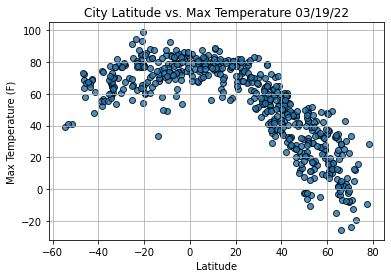

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

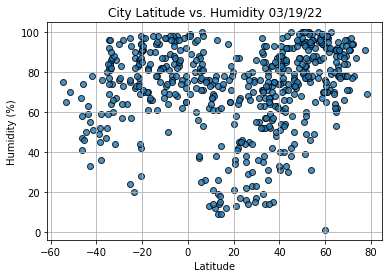

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

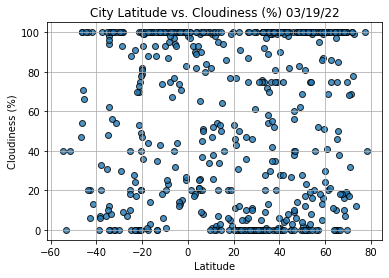

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()